In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


# Data File Loaded Externally from Local Drive from Online 

In [62]:
dataset = pd.read_csv(r"C:\Users\SUBRATA MONDAL\Downloads\house_prices_dataset.csv")



In [66]:
dataset.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


# Understanding the Datset 

In [63]:
dataset.keys()

Index(['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price'], dtype='object')

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [69]:
dataset["price"].describe()

count     10000.000000
mean     263011.571609
std       98336.945117
min      -95613.138249
25%      196791.510684
50%      262497.361236
75%      330445.581908
max      660168.255648
Name: price, dtype: float64

<Axes: >

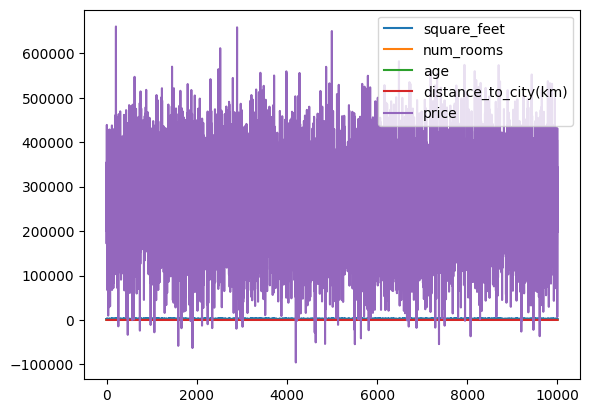

In [68]:
dataset.plot()

# Data Cleaning 

In [143]:
# Null Value Checking : 

dataset.isnull().sum()

square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64

In [77]:
# Duplicate Value checking : 

dataset.duplicated().sum()

np.int64(0)

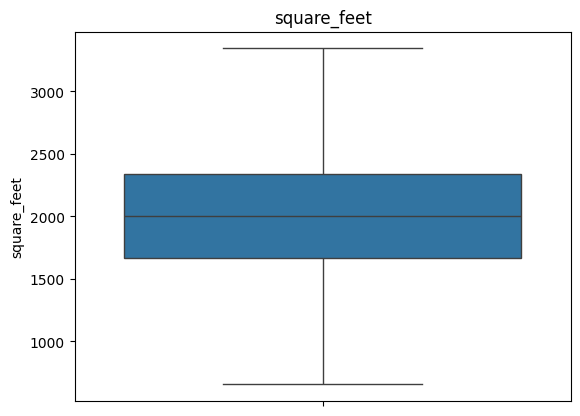

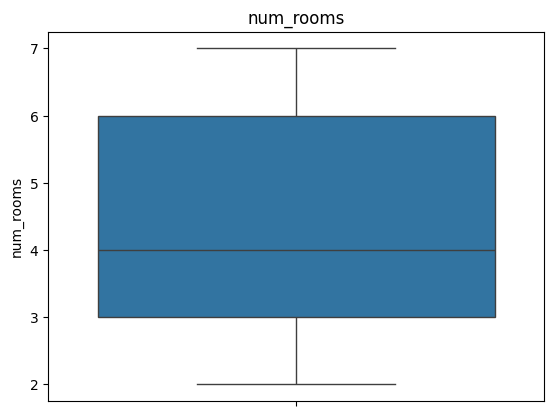

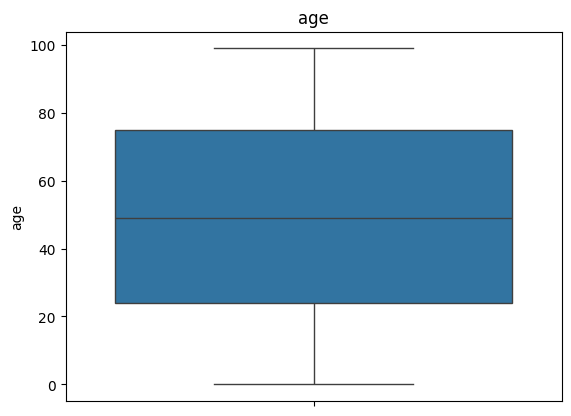

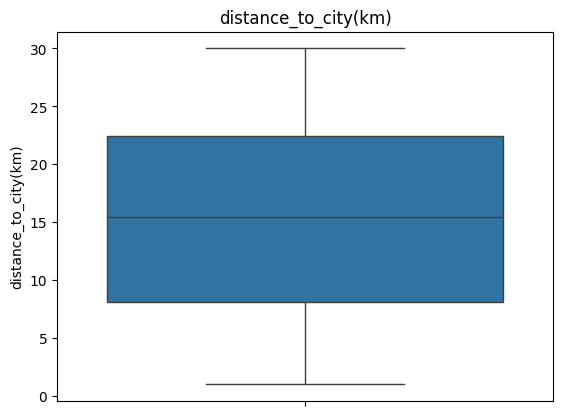

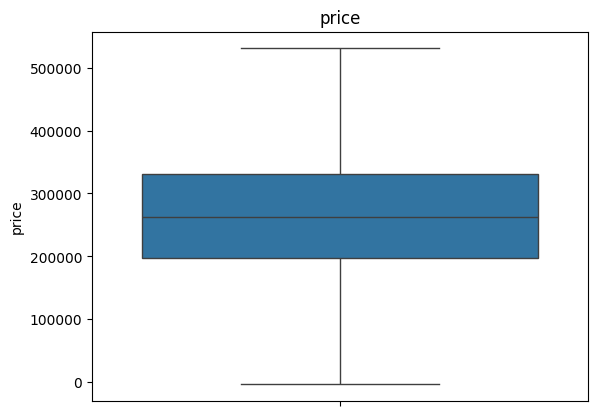

In [245]:
# OutLiers Checking  : 

for i in ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price']:
    sns.boxplot(dataset[i])
    plt.title(i)
    plt.show()

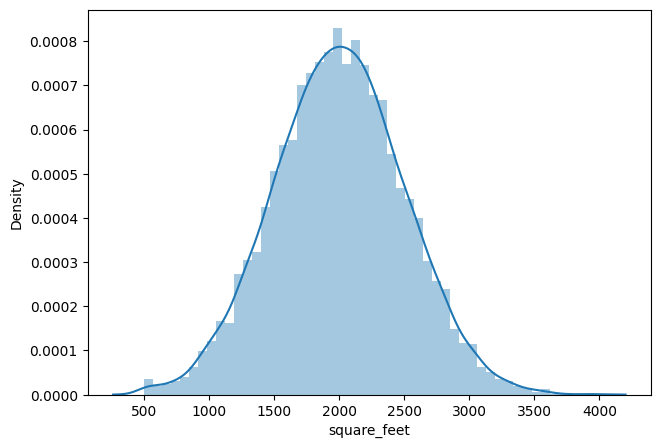

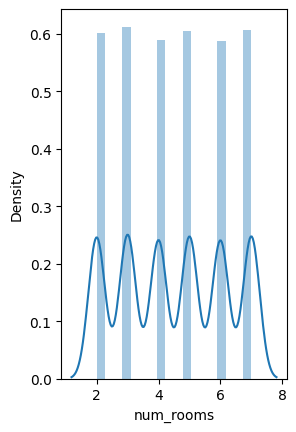

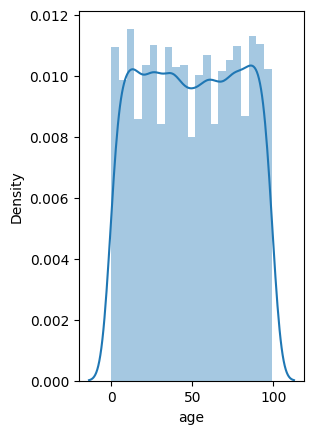

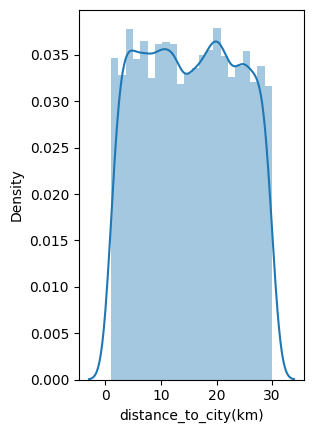

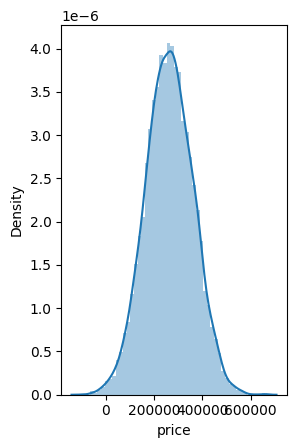

In [87]:
# Check for Column Distribution 

plt.figure(figsize=(16,5))

for i in ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price']:

    plt.subplot(1,2,1)
    sns.distplot(dataset[i])
    plt.show()

# as we can see some are Normally Distributed some are not 


In [88]:
dataset['price'].skew()
dataset['square_feet'].kurt()


np.float64(-0.018424616100283675)

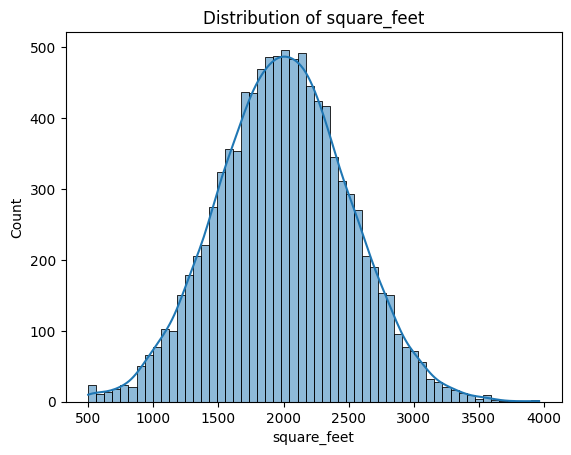

In [109]:
sns.histplot(dataset['square_feet'], kde=True)
plt.title('Distribution of square_feet')
plt.show()

In [90]:
# Solving Outlier for Price 

dataset['price'].describe()


count     10000.000000
mean     263011.571609
std       98336.945117
min      -95613.138249
25%      196791.510684
50%      262497.361236
75%      330445.581908
max      660168.255648
Name: price, dtype: float64

In [96]:
# As the graph is Close to (  Normal Distribution and Symmetric ) 

# Lets go for Z - Score 

mean  = dataset['price'].mean()
sd = dataset['price'].std()
max_val = dataset['price'].max()
min_val = dataset['price'].min()


UL = mean  + 3*sd
LL = mean  - 3*sd

In [97]:
UL

np.float64(558022.4069605451)

In [98]:
LL

np.float64(-31999.263743542484)

In [103]:
# This are all the outliers 

dataset[(dataset['price']< UL) |  (dataset['price']< LL)]

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
...,...,...,...,...,...
9995,2650.551032,7,9,18.126034,431344.267823
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384301
9998,2247.882787,6,73,27.931014,280766.827379


In [107]:
# lets remove the outlier 

dataset['price'] = np.where(
    dataset['price'] > UL,
    UL,
    np.where(
        dataset['price'] <  LL,
        LL,
        dataset['price']
    )
)

<Axes: ylabel='price'>

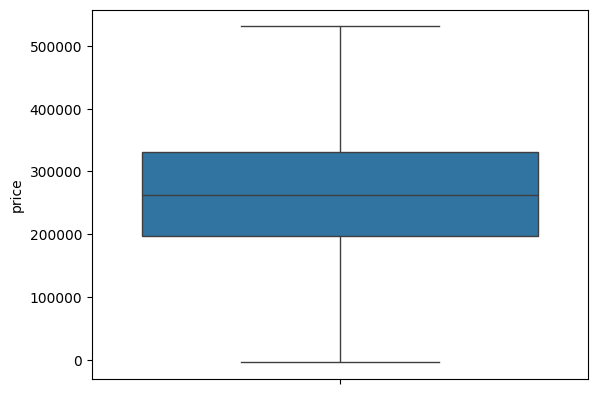

In [145]:
sns.boxplot(dataset['price'])

In [125]:
# Not all outliers gets solved for price so lets go for IQR Method 

Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)

IQR =  Q3 - Q1

I_UL = Q3 + 1.5*IQR
I_LL = Q1 - 1.5*IQR


In [117]:
dataset['price'].describe()




count     10000.000000
mean     262990.495342
std       98117.173164
min      -31999.263744
25%      196791.510684
50%      262497.361236
75%      330445.581908
max      558022.406961
Name: price, dtype: float64

In [126]:
dataset[(dataset['price']>I_UL) | (dataset['price']<I_LL) ]

,square_feet,num_rooms,age,distance_to_city(km),price
209,3926.365745,7,0,19.343934,558022.406961
262,500.000000,3,76,12.561114,-14286.956405
471,849.039418,2,23,29.665812,-31999.263744
622,2941.012248,7,11,5.347990,546905.278367
740,1079.562884,3,93,27.508514,-23998.186167
...,...,...,...,...,...
9467,1070.168480,4,83,27.935420,-22218.706035
9606,599.044215,2,33,19.913306,-31999.263744
9787,2838.227481,7,29,1.086042,537102.221041
9834,3082.760726,7,16,13.937077,532605.602317


In [127]:
# Lets not Trim , go for Capping this data may be sensetive to us 

dataset['price'] = np.where(
    dataset['price'] > I_UL,
    I_UL,
    np.where(
        dataset['price'] <  I_LL,
        I_LL,
        dataset['price']
    )
)


In [137]:
# lets use IQR Method for square_feet

Q1 = dataset['square_feet'].quantile(0.25)
Q3 = dataset['square_feet'].quantile(0.75)

IQR = Q3 - Q1

UB = Q3 + 1.5*IQR
LB = Q1 - 1.5*IQR

In [131]:
dataset['square_feet'].describe()

count    10000.000000
mean      1999.147496
std        501.021194
min        500.000000
25%       1663.704735
50%       1998.702512
75%       2335.540444
max       3963.118853
Name: square_feet, dtype: float64

In [138]:
dataset[(dataset['square_feet']>UB) | (dataset['square_feet']<LB) ]

,square_feet,num_rooms,age,distance_to_city(km),price
179,3360.084583,2,99,7.656454,406513.612495
209,3926.365745,7,0,19.343934,530926.688744
262,500.000000,3,76,12.561114,-3689.596152
478,3539.440404,7,92,25.594193,435639.613594
646,651.556679,6,31,3.970722,199203.441227
...,...,...,...,...,...
8726,3578.885642,6,25,23.211102,530926.688744
9258,3384.186803,3,46,21.914057,428654.089163
9573,627.350223,5,18,9.418972,84462.848956
9606,599.044215,2,33,19.913306,-3689.596152


In [139]:
dataset['square_feet'] = np.where(
    dataset['square_feet'] > UB,
    UB,
    np.where(
        dataset['square_feet'] <  LB,
        LB,
        dataset['square_feet']
    )
)

In [142]:
# Checking for Skewed or Unbalance Target  Checking 

dataset['price'].skew()   # hence it is closed to 0 , no need of transformation 

# if Value > 1 or Value < -1 , then have to do transfrormation 


np.float64(0.0011164963208352325)

In [146]:
# Feature Scaling Checking : 

dataset.describe()

# High scale value is there in Price and also Independent variables , so lets stan

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1998.949846,4.49510,49.516900,15.362148,262992.911367
std,498.015957,1.71116,28.992336,8.325101,97780.103862
min,655.951172,2.00000,0.000000,1.000161,-3689.596152
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3343.294007,7.00000,99.000000,29.993892,530926.688744


In [147]:
dataset.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [157]:
# lets Split the Data First 
# iloc[row selection , column selection]
# ( start : end ) 

X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,4:]


In [164]:
X.head()

,square_feet,num_rooms,age,distance_to_city(km)
0,2248.357077,3,92,22.997972
1,1930.867849,2,22,13.984254
2,2323.844269,6,33,21.500945
3,2761.514928,3,63,10.343638
4,1882.923313,7,54,25.485200


In [165]:
Y.head()

,price
0,200374.090410
1,268784.847337
2,315020.857676
3,355111.468459
4,234197.123903


In [162]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size =0.25,random_state = 42)
                                              

In [234]:
from sklearn.preprocessing import StandardScaler


# we trasnsformed the Independent featues as there are some data which may dominate the Model 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# no need to Scale Targent Specially in Linear Regression Model 


In [235]:
X_train

array([[-1.02352266,  0.28643109, -1.12102947, -0.65869389],
       [ 0.64464299, -0.87320895, -0.84545797, -0.72668377],
       [-1.13590431,  0.86625111,  0.32572092,  0.77449685],
       ...,
       [-0.70433191, -0.29338893,  0.15348873, -0.4956613 ],
       [ 0.20038934, -1.45302898, -0.50099359, -1.46230955],
       [-1.72527944,  0.86625111, -0.08763633, -1.61174526]])

<Axes: >

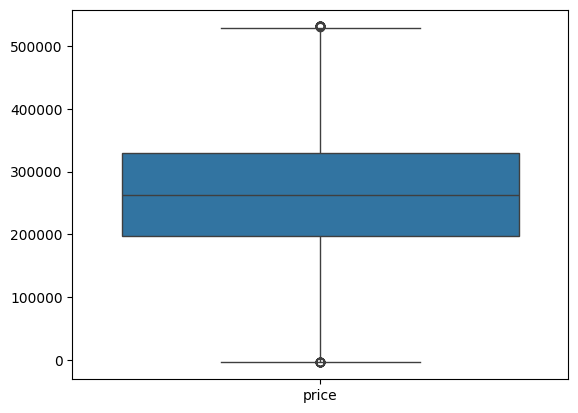

# Explaratory Data Analysis ( EDA ) 

In [185]:
# Lets understand the Clean data 

# Lets Check for Redundancy : 


In [174]:
dataset.duplicated().sum()


np.int64(0)

In [173]:
dataset.nunique() 

square_feet              9919
num_rooms                   6
age                       100
distance_to_city(km)    10000
price                    9938
dtype: int64

In [184]:
dataset['num_rooms'].unique()  
# can be removed this as it does not affect much on our dataset , has only 6 unique values

array([3, 2, 6, 7, 5, 4])

<Axes: >

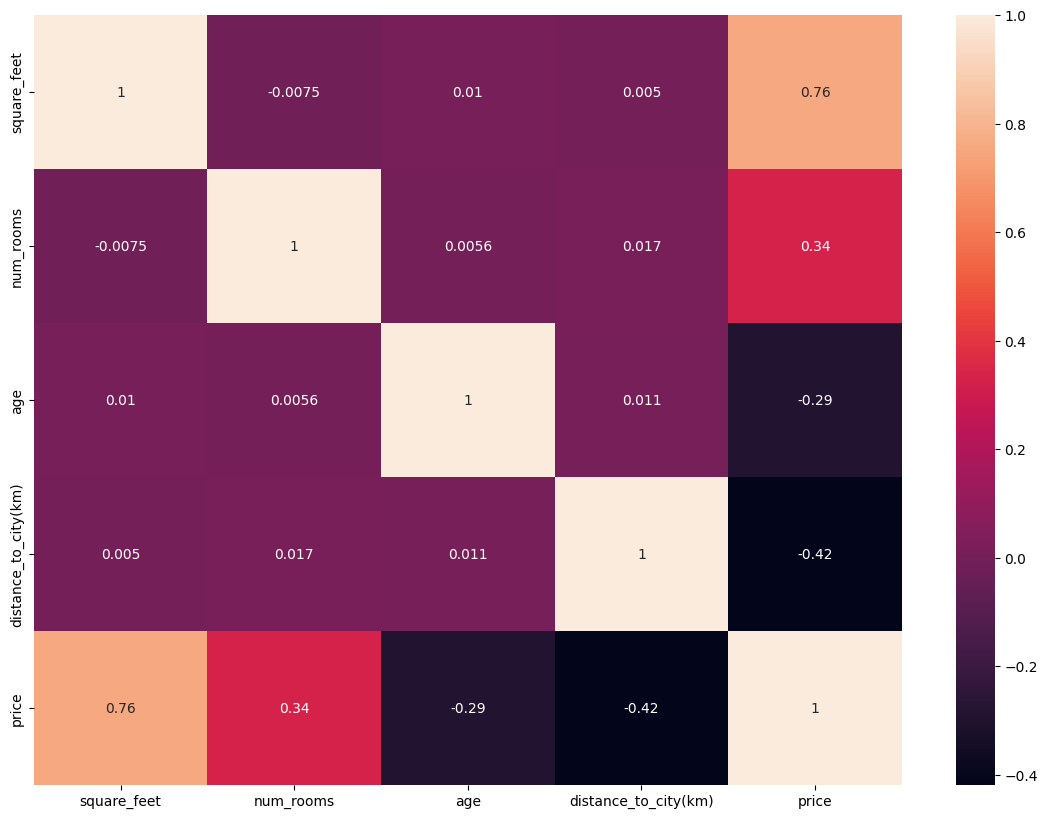

In [187]:
# Relationship Analysis 


plt.figure(figsize=(14,10))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix,annot = True)

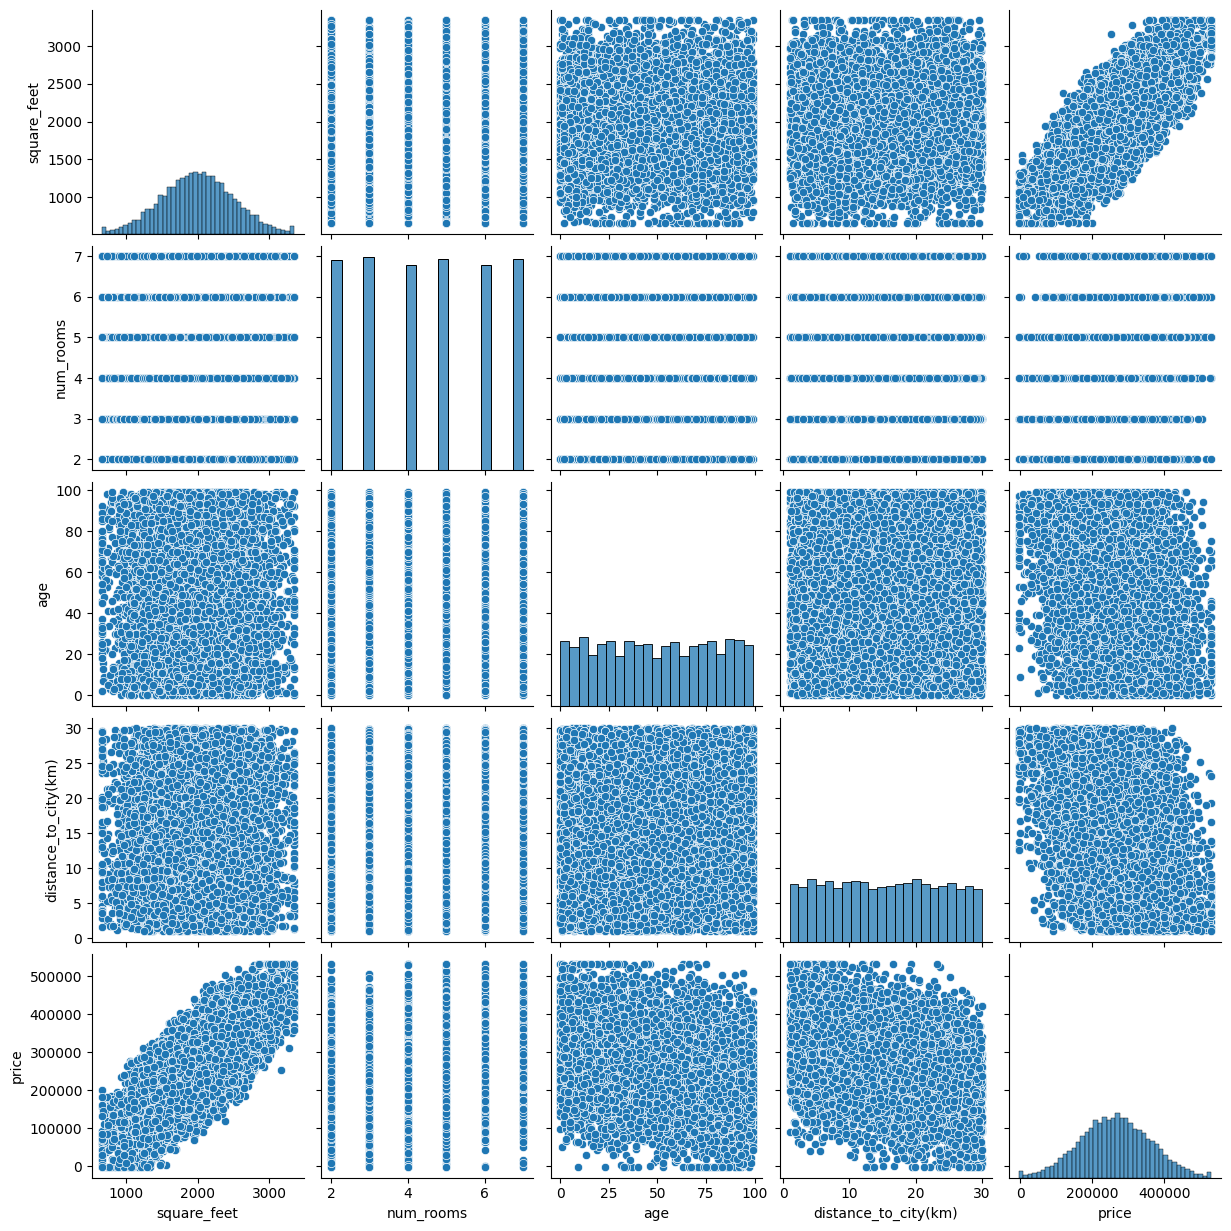

In [189]:
sns.pairplot(dataset)

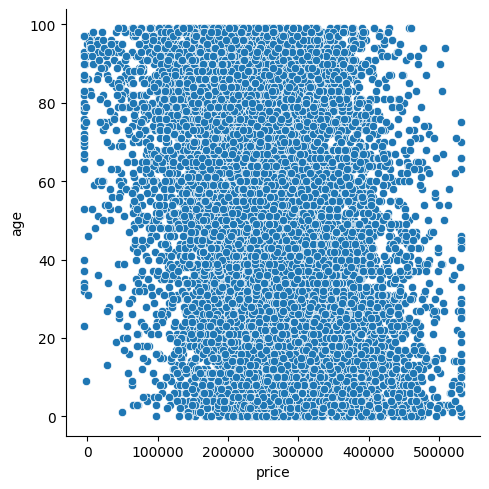

In [205]:
# Scatter Plot 



sns.relplot(x = "price", y = "age" , data = dataset)

<Axes: xlabel='price', ylabel='Density'>

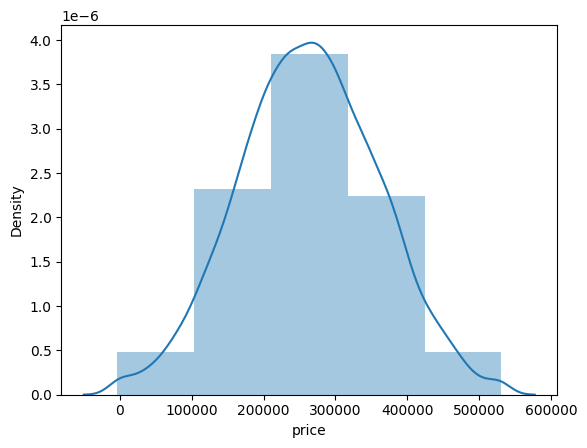

In [200]:
sns.distplot(dataset['price'] , bins = 5 )

# this showes that this value is likely Normally Distributed

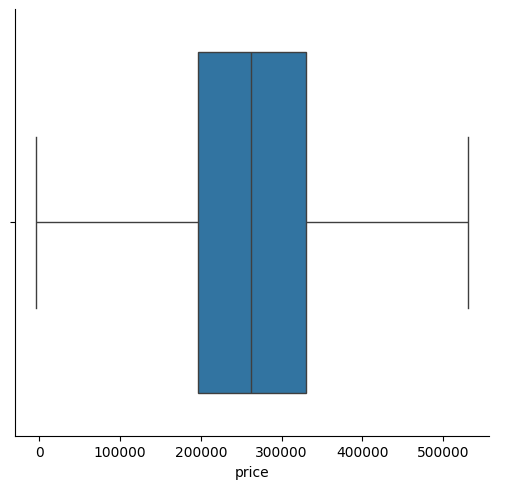

In [202]:
sns.catplot(x ='price', kind = 'box' , data = dataset)

# No Outlier 

In [206]:
dataset.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1998.949846,4.49510,49.516900,15.362148,262992.911367
std,498.015957,1.71116,28.992336,8.325101,97780.103862
min,655.951172,2.00000,0.000000,1.000161,-3689.596152
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3343.294007,7.00000,99.000000,29.993892,530926.688744


<Axes: xlabel='num_rooms', ylabel='Density'>

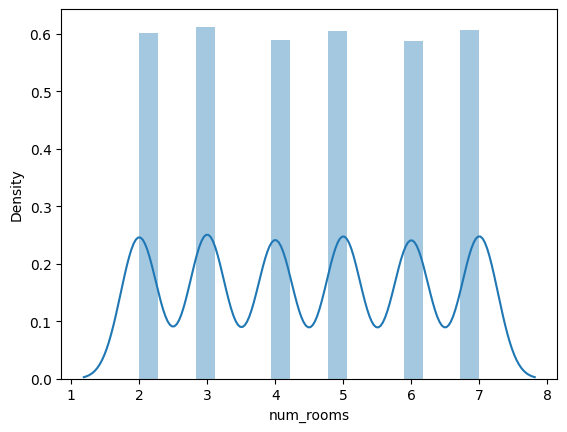

In [208]:
sns.distplot(dataset['num_rooms'])

In [210]:
dataset.nunique()

# here distance_to_city(km) data affects more in the dataset 

square_feet              9919
num_rooms                   6
age                       100
distance_to_city(km)    10000
price                    9938
dtype: int64

<Axes: xlabel='distance_to_city(km)', ylabel='Density'>

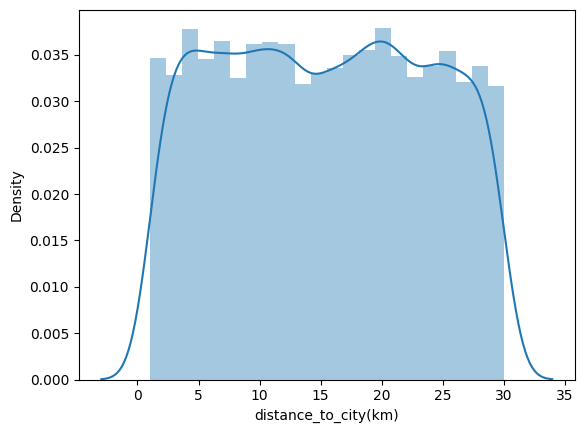

In [212]:
sns.distplot(dataset['distance_to_city(km)'])

# Model Training 

In [213]:
from sklearn.linear_model import LinearRegression


In [215]:
regression = LinearRegression()  # Linear Model is Choosed 

In [237]:
# here we are training our model with our Train Data's 
regression.fit(X_train_scaled,Y_train) 


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Model Testing / Evaluation 

In [239]:
# We can use MSE , RMSE , MAE , R^2 Score  for Linear Regression 

price_predict = regression.predict(X_test_scaled)
price_predict

array([[317439.85947141],
       [245462.89020891],
       [222303.7237772 ],
       ...,
       [479241.58654632],
       [266793.2072788 ],
       [394508.31445872]])

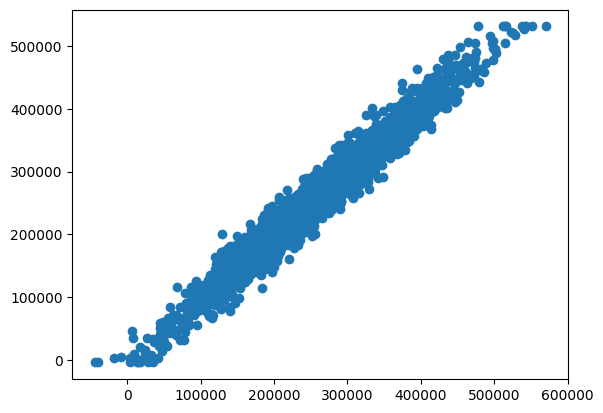

In [240]:
plt.scatter(price_predict,Y_test) 
# this figure shows that out prediction works good and all the prediction are proper , as the graph is linear 

In [250]:
residuals = Y_test - price_predict
residuals

,price
6252,32841.625247
4684,-6928.486982
1731,1246.803636
4742,1375.166884
4521,9724.175205
...,...
4862,-15753.304857
7025,15553.359805
7647,-36012.464837
7161,-33546.376263


<Axes: ylabel='Density'>

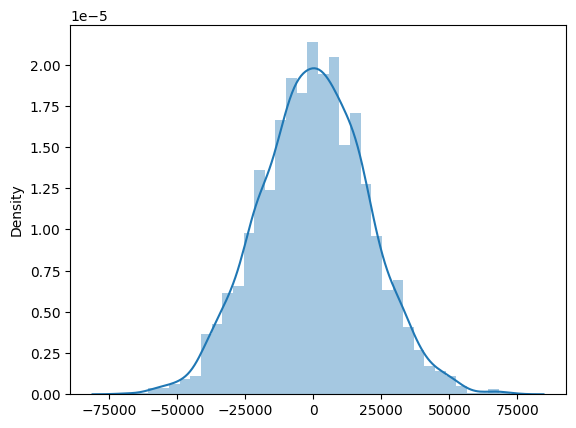

In [252]:
sns.distplot(residuals)

In [253]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [256]:


# Calculate metrics
mse = mean_squared_error(Y_test, price_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, price_predict)
r2 = r2_score(Y_test, price_predict)

# Print results

print("Mean Absolute Error (MAE):", mae) 
# it basicaly vairies the price within +-15,789 of actual Value 

print("Mean Squared Error (MSE):", mse)
# it is sensetive to larger erros but , Liner Regression wiil minimise error as our model is good Optimized 

print("Root Mean Squared Error (RMSE):", rmse)
# it basicaly vairies the price within +-19835 of actual Value 

print("R-squared (R²):", r2) 
# it is near by 1 so Good and Fit  as it captures all the patterns 

# as we go through all the checking our model is reliable and performing well 



Mean Absolute Error (MAE): 15789.56121539796
Mean Squared Error (MSE): 393465136.0488257
Root Mean Squared Error (RMSE): 19835.955637398107
R-squared (R²): 0.9588312477599739


# Cross Validation 

In [260]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the model

# Use 5-fold cross-validation (you can change to 10)
# scoring='r2' will calculate R² for each fold
cv_scores = cross_val_score(regression, X, Y, cv=5, scoring='r2')

print("R² scores for each fold:", cv_scores)
# THIS SHOWS MODEL IS CONSISTENT 


print("Mean R² across folds:", np.mean(cv_scores))
# This Indecates 95% id variance in house Price so - very strong model 

print("Standard Deviation of R²:", np.std(cv_scores))
# This indecates model is stable 




R² scores for each fold: [0.95737699 0.95788809 0.95292185 0.95917554 0.96063153]
Mean R² across folds: 0.9575988012279589
Standard Deviation of R²: 0.0025957759390276124


In [263]:
mean_cv_r2 = cv_scores.mean()

if r2 > mean_cv_r2 + 0.01:  # adding small tolerance for floating point differences
    print("Model Overfitting: performing well on training data only, not on unseen data")
elif mean_cv_r2 > r2 + 0.01:
    print("Model Underfitting: not learning patterns properly")
else:
    print("Model is Good: generalizing well")


Model is Good: generalizing well



# Pickling the Model File for Deployment 

In [268]:
import pickle 

pickle.dump(scaler,open('scaler.pkl','wb'))

In [269]:
pickle.dump(regression,open('regession_model.pkl','wb'))

In [267]:
dataset.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
